In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [192]:
df = pd.read_csv('data_youtube.csv', header = 0)

In [193]:
df

,video_channelId,video_channelTitle,video_channelSubscriber,video_id,video_title,video_publishedAt,video_description,video_thumbnails,video_tags,video_categoryId,video_viewCount,video_likeCount,video_commentCount,video_duration_teaser,video_id_mv_official,video_title_mv_official,video_publishedAt_mv_official,video_duration_mv_official,video_viewCount_mv_official
0,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,QKgGAvlnjMk,WINNER - ‘I LOVE U’ M/V TEASER,2022-06-29 15:00:14+00:00,#WINNER #위너 #4thMINIALBUM #HOLIDAY #TITLE #ILO...,https://i.ytimg.com/vi/QKgGAvlnjMk/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'WI...",10,367152.0,50097.0,2851.0,PT33S,waMAVn2hHBM,WINNER - ‘I LOVE U’ M/V,2022-07-05 09:00:12+00:00,PT3M11S,20181072.0
1,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,Z4Byo3MYksk,강승윤 (KANG SEUNG YOON) - 'BORN TO LOVE YOU’ M/V...,2022-03-10 15:00:30+00:00,#강승윤 #KANGSEUNGYOON #4thDIGITALSINGLE #TITLE #...,https://i.ytimg.com/vi/Z4Byo3MYksk/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'WI...",10,308600.0,59197.0,1962.0,PT48S,9mrlCwoOQtQ,강승윤 (KANG SEUNG YOON) - 'BORN TO LOVE YOU' M/V,2022-03-14 09:00:31+00:00,PT3M1S,11893058.0
2,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,o_gRFsCEor8,MINO - '탕!♡ (TANG!♡)' M/V TEASER,2021-12-02 15:00:25+00:00,#MINO #송민호 #WINNER #위너 #3rdFULLALBUM #TO_INFIN...,https://i.ytimg.com/vi/o_gRFsCEor8/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'WI...",10,475455.0,40450.0,1477.0,PT22S,VAEEblk-qDU,MINO - '탕!♡ (TANG!♡)' M/V,2021-12-07 09:00:13+00:00,PT3M16S,15465502.0
3,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,jMHFF6EaOr0,강승윤(KANG SEUNG YOON) - '아이야 (IYAH)' M/V TEASER #2,2021-03-27 15:00:26+00:00,#강승윤 #KANGSEUNGYOON #1stFULLALBUM #PAGE #TITLE...,https://i.ytimg.com/vi/jMHFF6EaOr0/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'WI...",10,127774.0,23668.0,1707.0,PT46S,-HVfBljdSWE,강승윤(KANG SEUNG YOON) - '아이야 (IYAH)' M/V,2021-03-29 09:00:00+00:00,PT4M15S,12810447.0
4,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,7nlDbatnlxo,강승윤(KANG SEUNG YOON) - '아이야 (IYAH)' M/V TEASER,2021-03-25 15:00:03+00:00,#강승윤 #KANGSEUNGYOON #1stFULLALBUM #PAGE #TITLE...,https://i.ytimg.com/vi/7nlDbatnlxo/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', 'WI...",10,194456.0,37255.0,2731.0,PT28S,-HVfBljdSWE,강승윤(KANG SEUNG YOON) - '아이야 (IYAH)' M/V,2021-03-29 09:00:00+00:00,PT4M15S,12810447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,UCg8ZzloDPTrOiGztK0C9txQ,THEBLACKLABEL,2670000,KESoZeKGNX8,Zion.T - '멋지게 인사하는 법(Hello Tutorial) (feat. 슬기...,2018-10-12 15:00:02+00:00,#ZIONT #자이언티 #ZZZ #멋지게인사하는법 #HelloTutorial #TE...,https://i.ytimg.com/vi/KESoZeKGNX8/default.jpg,"['#자이언티', '#ZIONT', '#슬기', '#SEULGI', '#ZZZ', ...",10,27141.0,NaN,57.0,PT21S,nqMYG2Riq54,Zion.T - '멋지게 인사하는 법(Hello Tutorial) (feat. 슬기...,2018-10-15 09:00:04+00:00,PT3M22S,8479534.0
839,UCcADqTjMyMol8B8mWm9n6rA,SECHSKIES,545000,ASTklj0bfF8,SECHSKIES - 'ALL FOR YOU' M/V TEASER,2020-01-23 07:00:00+00:00,#SECHSKIES #젝스키스 #THE1STMINIALBUM #ALLFORYOU #...,https://i.ytimg.com/vi/ASTklj0bfF8/default.jpg,"['YG Entertainment', 'YG', '와이지', 'K-pop', '젝스...",10,83803.0,10209.0,495.0,PT36S,X-jbgKPEf40,SECHSKIES - 'ALL FOR YOU' M/V,2020-01-28 09:00:10+00:00,PT4M11S,9067655.0
840,UCcADqTjMyMol8B8mWm9n6rA,SECHSKIES,545000,9aDxjTXRyGw,EUN JIWON(은지원) - ‘불나방 (I’M ON FIRE) (Feat. Blu...,2019-06-25 01:00:01+00:00,#EUNJIWON #은지원 #G1 #불나방 #ImOnFire #YG,https://i.ytimg.com/vi/9aDxjTXRyGw/default.jpg,"['젝스키스', '젝키', 'SECHSKIES', '은지원', 'EUN JIWON'...",10,159632.0,14685.0,893.0,PT32S,iR7HsIrFqoU,EUN JIWON(은지원) - '불나방 (I’M ON FIRE) (Feat. Blu...,2019-06-27 09:00:06+00:00,PT3M40S,13192898.0
841,UCcADqTjMyMol8B8mWm9n6rA,SECHSKIES,545000,EuWyOcvZ0Ac,SECHSKIES - ‘웃어줘(SMILE)’ M/V TEASER,2017-09-20 07:00:00+00:00,#SECHSKIES #젝스키스 #젝키 #ANOTHERLIGHT #웃어줘 #SMILE...,https://i.ytimg.com/vi/EuWyOcvZ0Ac/default.jpg,"['젝스키스', '젝키', 'SECHSKIES', '은지원', '장수원', '강성훈...",10,45853.0,4241.0,268.0,PT31S,eijTpIN6tsA,SECHSKIES - ‘웃어줘(SMILE)’ M/V,2017-09-21 09:00

In [194]:
df.describe()

,video_channelSubscriber,video_categoryId,video_viewCount,video_likeCount,video_commentCount,video_viewCount_mv_official
count,8.430000e+02,843.000000,8.430000e+02,8.400000e+02,8.430000e+02,8.430000e+02
mean,3.697972e+07,10.185053,2.229271e+06,2.339225e+05,1.560630e+04,6.075908e+07
std,1.871778e+07,1.545483,5.982573e+06,5.597284e+05,6.258393e+04,1.631465e+08
min,5.450000e+05,10.000000,2.643000e+04,2.440000e+02,2.300000e+01,5.404600e+04
25%,3.100000e+07,10.000000,2.738345e+05,2.609125e+04,1.252000e+03,2.930450e+06
50%,3.100000e+07,10.000000,7.782310e+05,7.717450e+04,3.671000e+03,1.282400e+07
75%,3.100000e+07,10.000000,1.911255e+06,2.348848e+05,9.754500e+03,4.951160e+07
max,8.270000e+07,24.000000,7.455821e+07,6.455170e+06,1.120796e+06,1.973526e+09


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_channelId                843 non-null    object 
 1   video_channelTitle             843 non-null    object 
 2   video_channelSubscriber        843 non-null    int64  
 3   video_id                       843 non-null    object 
 4   video_title                    843 non-null    object 
 5   video_publishedAt              843 non-null    object 
 6   video_description              842 non-null    object 
 7   video_thumbnails               843 non-null    object 
 8   video_tags                     782 non-null    object 
 9   video_categoryId               843 non-null    int64  
 10  video_viewCount                843 non-null    float64
 11  video_likeCount                840 non-null    float64
 12  video_commentCount             843 non-null    flo

In [196]:
cats = list(df.select_dtypes('O').columns)
nums = list(df.select_dtypes(['float', 'int']).columns)
nums

['video_channelSubscriber',
 'video_categoryId',
 'video_viewCount',
 'video_likeCount',
 'video_commentCount',
 'video_viewCount_mv_official']

In [197]:
df[nums].describe()

,video_channelSubscriber,video_categoryId,video_viewCount,video_likeCount,video_commentCount,video_viewCount_mv_official
count,8.430000e+02,843.000000,8.430000e+02,8.400000e+02,8.430000e+02,8.430000e+02
mean,3.697972e+07,10.185053,2.229271e+06,2.339225e+05,1.560630e+04,6.075908e+07
std,1.871778e+07,1.545483,5.982573e+06,5.597284e+05,6.258393e+04,1.631465e+08
min,5.450000e+05,10.000000,2.643000e+04,2.440000e+02,2.300000e+01,5.404600e+04
25%,3.100000e+07,10.000000,2.738345e+05,2.609125e+04,1.252000e+03,2.930450e+06
50%,3.100000e+07,10.000000,7.782310e+05,7.717450e+04,3.671000e+03,1.282400e+07
75%,3.100000e+07,10.000000,1.911255e+06,2.348848e+05,9.754500e+03,4.951160e+07
max,8.270000e+07,24.000000,7.455821e+07,6.455170e+06,1.120796e+06,1.973526e+09


In [198]:
df[cats].describe()

,video_channelId,video_channelTitle,video_id,video_title,video_publishedAt,video_description,video_thumbnails,video_tags,video_duration_teaser,video_id_mv_official,video_title_mv_official,video_publishedAt_mv_official,video_duration_mv_official
count,843,843,843,843,843,842,843,782,843,843,843,843,843
unique,10,10,843,841,840,829,843,595,59,613,613,610,149
top,UCEf_Bc-KVd7onSeifS3py9g,SMTOWN,QKgGAvlnjMk,ZICO (지코) 'SEOUL DRIFT' MV Teaser,2016-08-08 03:00:01+00:00,Creative Director : NU KIM\n\nVisual Creative ...,https://i.ytimg.com/vi/QKgGAvlnjMk/default.jpg,"['HYBE', 'HYBE LABELS', '하이브', '하이브레이블즈']",PT24S,EgBg5kIeN30,TXT (투모로우바이투게더) 'Good Boy Gone Bad [Japanese V...,2022-08-30 15:00:01+00:00,PT3M50S
freq,498,498,1,2,2,2,1,57,50,8,8,10,21


<AxesSubplot:>

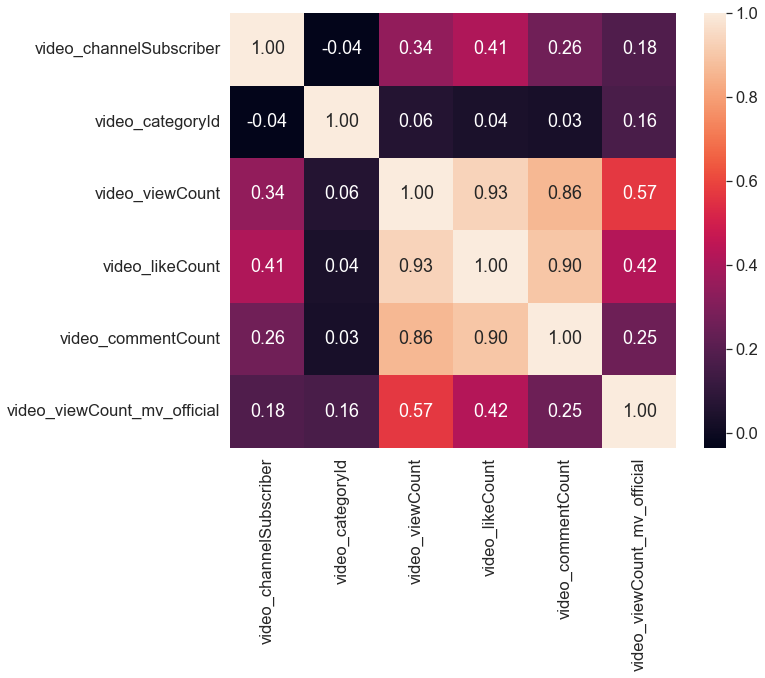

In [199]:
corr_= df[nums].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_, annot=True, fmt = ".2f")

In [200]:
df_pre = df.copy()

In [201]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_channelId                843 non-null    object 
 1   video_channelTitle             843 non-null    object 
 2   video_channelSubscriber        843 non-null    int64  
 3   video_id                       843 non-null    object 
 4   video_title                    843 non-null    object 
 5   video_publishedAt              843 non-null    object 
 6   video_description              842 non-null    object 
 7   video_thumbnails               843 non-null    object 
 8   video_tags                     782 non-null    object 
 9   video_categoryId               843 non-null    int64  
 10  video_viewCount                843 non-null    float64
 11  video_likeCount                840 non-null    float64
 12  video_commentCount             843 non-null    flo

In [202]:
def convert_tags_to_list(string_tag):
    list_tag= re.sub('\\[|\\]','',string_tag).split(',')
    return list_tag
    

In [203]:
no_tags = []
list_tags_teaser = list(df_pre['video_tags'])
# isinstance('abc', str)
for list_tag in list_tags_teaser:
    # print(type(list_tag))
    if isinstance(list_tag,str):
        no_tags.append(len(convert_tags_to_list(list_tag)))
    else:
        no_tags.append(np.nan)
   


In [204]:
title_len = []

titles_teaser = list(df_pre['video_title'])
for title_teaser  in  titles_teaser:
    title_len.append(len(title_teaser))


In [205]:
description_len = []
descriptions_teaser = list(df_pre['video_description'])

for description_teaser in descriptions_teaser:
    if isinstance(description_teaser,str):
        description_len.append(len(description_teaser))
    else:
        description_len.append(np.nan)
len(description_len)


843

In [206]:
df_pre['video_num_tag'] = no_tags
df_pre['video_title_len'] = title_len
df_pre['video_description_len'] = description_len

In [207]:
df_pre.isnull().sum()

video_channelId                   0
video_channelTitle                0
video_channelSubscriber           0
video_id                          0
video_title                       0
video_publishedAt                 0
video_description                 1
video_thumbnails                  0
video_tags                       61
video_categoryId                  0
video_viewCount                   0
video_likeCount                   3
video_commentCount                0
video_duration_teaser             0
video_id_mv_official              0
video_title_mv_official           0
video_publishedAt_mv_official     0
video_duration_mv_official        0
video_viewCount_mv_official       0
video_num_tag                    61
video_title_len                   0
video_description_len             1
dtype: int64

In [208]:
num_pre = list(df_pre.select_dtypes(['float','int']).columns)
num_pre = ['video_channelSubscriber',
 'video_categoryId',
 'video_viewCount',
 'video_likeCount',
 'video_commentCount',
 'video_num_tag',
 'video_title_len',
 'video_description_len',
 'video_viewCount_mv_official',]

<AxesSubplot:>

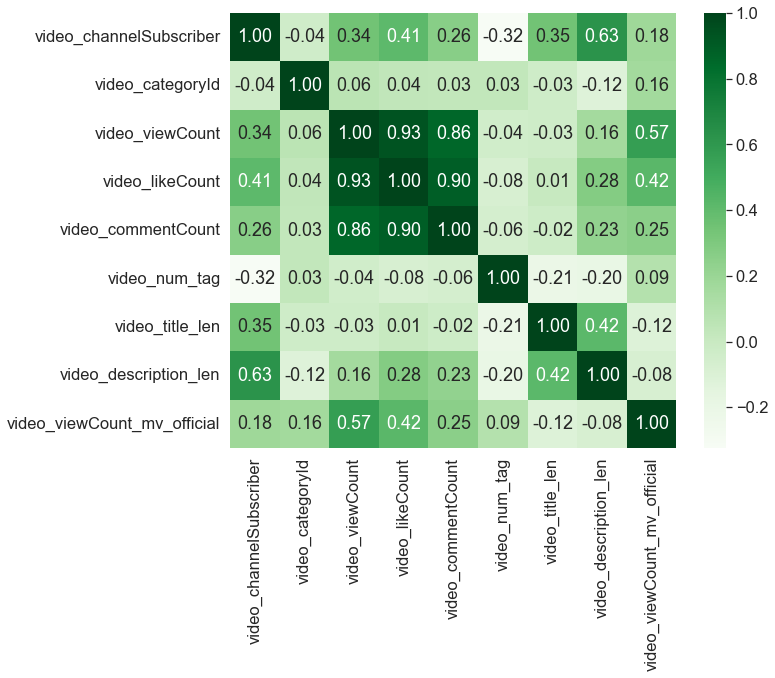

In [209]:
corr_= df_pre[num_pre].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap="Greens")

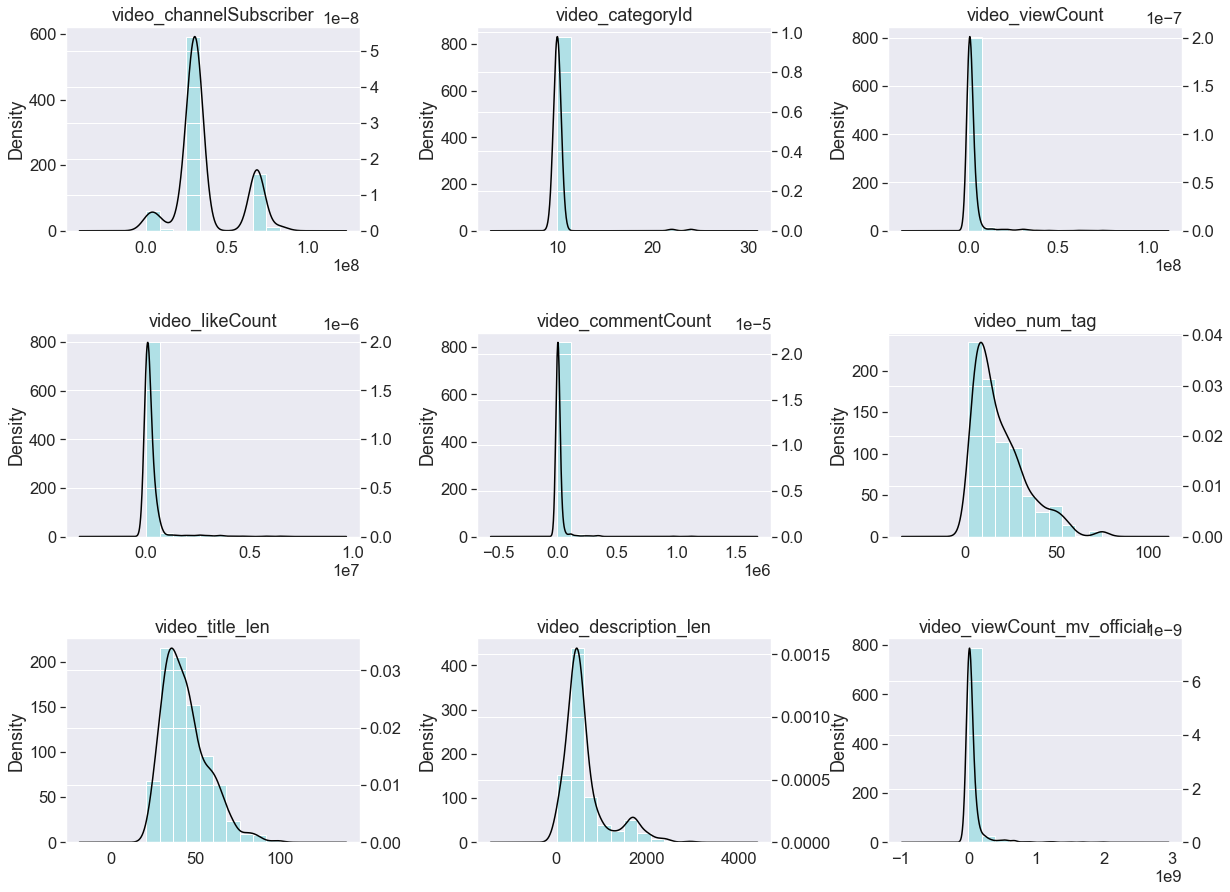

In [210]:
data_num = df_pre[num_pre]
plt.figure(figsize= (20, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.5)
for i, (name, col) in enumerate(data_num.iteritems()):
    plt.subplot(3, 3, i+1)
    col.hist( color='powderblue')
    ax2 = col.plot.kde( secondary_y=True, title=name, color='black')
    ax2.set_ylim(0)



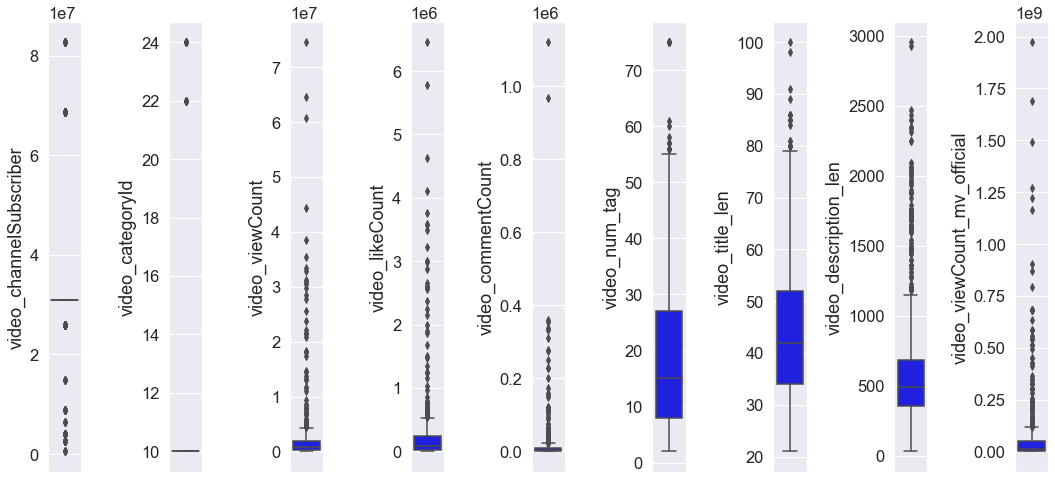

In [211]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.5)
for i in range(0, len(num_pre)):
    plt.subplot(1, 9, i+1)
    sns.boxplot(y=df_pre[num_pre[i]],color='blue',orient='v')
    plt.tight_layout();

In [212]:
# from typing import Tuple
# from sklearn.base import BaseEstimator, TransformerMixin


# def find_boxplot_boundaries(
#     col: pd.Series, whisker_coeff: float = 1.5
# ) -> Tuple[float, float]:
#     """Findx minimum and maximum in boxplot.

#     Args:
#         col: a pandas serires of input.
#         whisker_coeff: whisker coefficient in box plot
#     """
#     Q1 = col.quantile(0.25)
#     Q3 = col.quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - whisker_coeff * IQR
#     upper = Q3 + whisker_coeff * IQR
#     return lower, upper


# class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
#     def __init__(self, whisker_coeff: float = 1.5):
#         self.whisker = whisker_coeff
#         self.lower = None
#         self.upper = None

#     def fit(self, X: pd.Series):
#         self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
#         return self

#     def transform(self, X):
#         return X.clip(self.lower, self.upper)

In [213]:
# df_pre1 = df_pre.copy()

In [214]:
# for i in range(len(num_pre)):
#     df_pre1[num_pre[i]] =  BoxplotOutlierClipper().fit_transform(df_pre1[num_pre[i]] )

In [215]:
# df_pre1

In [216]:
# df_pre1['video_commentCount'] = BoxplotOutlierClipper().fit_transform(df_pre1['video_commentCount'])

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# df_pre1['video_commentCount'].hist(bins=50, ax=axes[0])
# df_pre1['video_commentCount'].to_frame().boxplot(ax=axes[1], vert=False);

In [217]:
# plt.figure(figsize=(15, 7))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.5)
# for i in range(0, len(num_pre)):
#     plt.subplot(3, 3, i+1)
#     df_pre1[num_pre[i]].to_frame().boxplot( vert=False)
#     plt.tight_layout()

In [218]:
num_pre = ['video_channelSubscriber',
 
 'video_viewCount',
 'video_likeCount',
 'video_commentCount',
 'video_num_tag',
 'video_title_len',
 'video_description_len',
 'video_viewCount_mv_official',]

Xử lý missing vallue

In [219]:
df_num = df_pre[num_pre].copy()

In [220]:
df_num.isna().sum()

video_channelSubscriber         0
video_viewCount                 0
video_likeCount                 3
video_commentCount              0
video_num_tag                  61
video_title_len                 0
video_description_len           1
video_viewCount_mv_official     0
dtype: int64

In [221]:
df_num['video_num_tag'].fillna(df_num['video_num_tag'].mean(),  inplace=True)
df_num['video_description_len'].fillna(df_num['video_description_len'].mean(),  inplace=True)
df_num['video_likeCount'].fillna(df_num['video_likeCount'].mean(),  inplace=True)

In [222]:
df_num.isna().sum()

video_channelSubscriber        0
video_viewCount                0
video_likeCount                0
video_commentCount             0
video_num_tag                  0
video_title_len                0
video_description_len          0
video_viewCount_mv_official    0
dtype: int64

In [223]:
df_num.describe()

,video_channelSubscriber,video_viewCount,video_likeCount,video_commentCount,video_num_tag,video_title_len,video_description_len,video_viewCount_mv_official
count,8.430000e+02,8.430000e+02,8.430000e+02,8.430000e+02,843.000000,843.000000,843.000000,8.430000e+02
mean,3.697972e+07,2.229271e+06,2.339225e+05,1.560630e+04,19.324808,44.233689,637.353919,6.075908e+07
std,1.871778e+07,5.982573e+06,5.587304e+05,6.258393e+04,13.776184,13.220538,489.444746,1.631465e+08
min,5.450000e+05,2.643000e+04,2.440000e+02,2.300000e+01,2.000000,21.000000,33.000000,5.404600e+04
25%,3.100000e+07,2.738345e+05,2.618100e+04,1.252000e+03,9.000000,34.000000,356.000000,2.930450e+06
50%,3.100000e+07,7.782310e+05,7.760100e+04,3.671000e+03,16.000000,42.000000,492.000000,1.282400e+07
75%,3.100000e+07,1.911255e+06,2.342418e+05,9.754500e+03,25.000000,52.000000,687.000000,4.951160e+07
max,8.270000e+07,7.455821e+07,6.455170e+06,1.120796e+06,75.000000,100.000000,2955.000000,1.973526e+09


predict

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [225]:
df_train, df_test = train_test_split(df_num, test_size=0.2, random_state= 43, shuffle= True)
X_train = df_train.copy()
y_train = X_train.pop("video_viewCount_mv_official")

X_test = df_test.copy()
y_test = X_test.pop("video_viewCount_mv_official")

In [226]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [227]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [228]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) 
    print("MSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) 
    print('R2 score: %.2f' % r2_score(ytest, pred)) 

In [229]:
# # LINEAR REGRESSION

from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)

# predicting the  test set results
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


eval_regression(model, y_pred_test, X_train, y_train, X_test, y_test)

MAE: 62316864.23
MSE: 147622659.28
R2 score: 0.56


In [230]:
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha = 3)
reg_ridge.fit(X_train, y_train)
y_pred = reg_ridge.predict(X_test)
eval_regression(reg_ridge, y_pred, X_train, y_train, X_test, y_test)

MAE: 80960117.61
MSE: 185626041.54
R2 score: 0.31


In [231]:
from sklearn.linear_model import Lasso


reg_lasso = Lasso(alpha = 3.8)
reg_lasso.fit(X_train, y_train)

y_pred = reg_lasso.predict(X_test)
eval_regression(reg_lasso, y_pred, X_train, y_train, X_test, y_test)


MAE: 62316896.17
MSE: 147622742.44
R2 score: 0.56


In [232]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)

hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio, normalize=[True,False])

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
clf = RandomizedSearchCV(elasticnet_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
eval_regression(clf, y_pred, X_train, y_train, X_test, y_test)

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You 

MAE: 95760582.70
MSE: 224176946.35
R2 score: -0.01


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

In [233]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# nEstimator = np.arange(1,100,1)
# depth =  np.arange(1,100,1)

# RF = RandomForestRegressor()
# hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
# gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2')
# gsv.fit(X_train, y_train)
# print("Best HyperParameter: ",gsv.best_params_)
# print(gsv.best_score_)

# maxDepth=gsv.best_params_['max_depth']
# nEstimators=gsv.best_params_['n_estimators']

In [234]:
# scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))
# plt.figure(figsize=(8, 8))
# plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
# plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
# plt.xlabel('n_estimators')
# plt.ylabel('max_depth')
# plt.colorbar()
# plt.xticks(np.arange(len(nEstimator)), nEstimator)
# plt.yticks(np.arange(len(depth)), depth)
# plt.title('Grid Search r^2 Score')
# plt.show()

In [235]:
print(X_train[100])
y_train[100]

[0.82959041 0.02421853 0.06136011 0.01143675 0.26027397 0.67948718
 0.56639288]


542349.0

In [236]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state= 143)
best_model1 = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
eval_regression(rf, y_pred, X_train, y_train, X_test, y_test)



MAE: 51538625.25
MSE: 153838392.55
R2 score: 0.53


In [237]:
print(rf.score(X_train, y_train))

0.9394411454220106


In [238]:
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
SK

,True Labels,Predicted Labels
438,1472644.0,4.601414e+06
111,220065085.0,1.304943e+08
518,215008708.0,7.450024e+07
611,165300417.0,6.776769e+07
128,94696094.0,4.520477e+07
...,...,...
559,148370109.0,2.050267e+08
270,11378552.0,3.008954e+07
545,968663.0,5.678827e+06
584,280828019.0,2.631564e+08


c:\Users\Admin\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


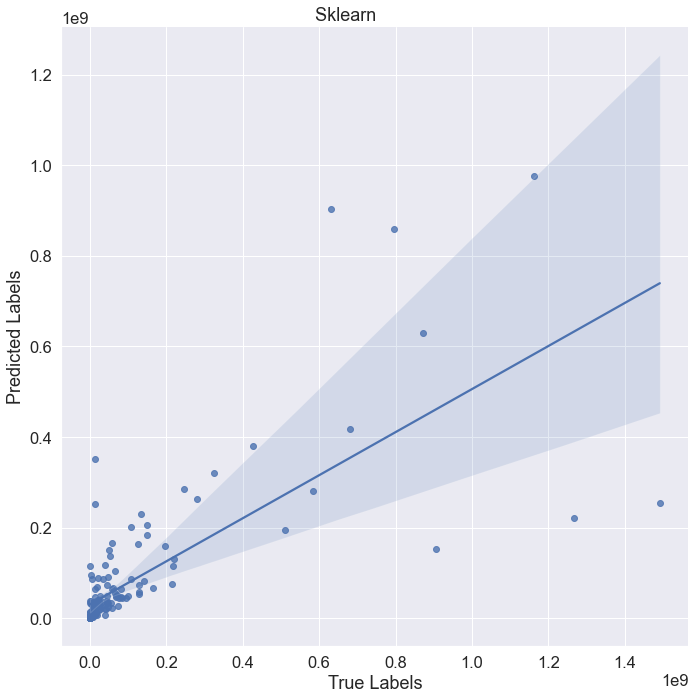

In [239]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)